In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('nature')

## RMSD of MMP2 only

In [23]:
from MDAnalysis.analysis import rms
#Read all the trajectories
protein_prod = mda.Universe('mmp2_only_sim/sys_prod/prod_mmp2_only.gro', 'mmp2_only_sim/sys_prod/prod_mmp2_only_compact_compact.xtc')

In [3]:
R = rms.RMSD(protein_prod,  # universe to align
    protein_prod,  # reference universe or atomgroup
    select='backbone',  # group to superimpose and calculate RMSD
    ref_frame=0)  # frame index of the reference

R.run(verbose=True)
times_p = R.results.rmsd[:,1]
rmsd_p = R.results.rmsd[:,2]

  0%|          | 0/30001 [00:00<?, ?it/s]

## Radius of Gyration: MMP2 only

In [4]:
from tqdm import tqdm
group = protein_prod.select_atoms('protein')		# change the atom selection for your specific system

Frame = []
times = []
Rgyr = []
for ts in tqdm(protein_prod.trajectory):
	Frame.append(ts.frame)
	times.append(protein_prod.trajectory.time)
	Rgyr.append(group.radius_of_gyration())

Rgyrp_table = np.vstack((Frame, times, Rgyr)).T

100%|██████████| 30001/30001 [05:34<00:00, 89.57it/s] 


## RMSD of MMP2 and TDL Complex

In [24]:
from MDAnalysis.analysis import rms
#Read all the trajectories
complex_prod = mda.Universe('mmp2_tdl_complex_sim/sys_prod/prod_mmp2_tdl_complex.gro', 'mmp2_tdl_complex_sim/sys_prod/prod_mmp2_tdl_complex_compact_compact.xtc')

In [6]:
R = rms.RMSD(complex_prod,  # universe to align
    complex_prod,  # reference universe or atomgroup
    select='backbone',  # group to superimpose and calculate RMSD
    ref_frame=0)  # frame index of the reference

R.run(verbose=True)
times_c = R.results.rmsd[:,1]
rmsd_c = R.results.rmsd[:,2]

  0%|          | 0/30001 [00:00<?, ?it/s]

## Radius of Gyration: MMP2 and TDL Complex

In [7]:
from tqdm import tqdm
group = complex_prod.select_atoms('protein')		# change the atom selection for your specific system

Frame = []
times = []
Rgyr = []
for ts in tqdm(complex_prod.trajectory):
	Frame.append(ts.frame)
	times.append(complex_prod.trajectory.time)
	Rgyr.append(group.radius_of_gyration())

Rgyrc_table = np.vstack((Frame, times, Rgyr)).T

100%|██████████| 30001/30001 [05:55<00:00, 84.50it/s]


## RMSF: Protein backbone and Carbon alpha

In [25]:
c_alphas_p = protein_prod.select_atoms('backbone and name CA')
R_p = rms.RMSF(c_alphas_p).run(verbose=True)

c_alphas_c = complex_prod.select_atoms('backbone and name CA')
R_c = rms.RMSF(c_alphas_c).run(verbose=True)

  0%|          | 0/30001 [00:00<?, ?it/s]

  0%|          | 0/30001 [00:00<?, ?it/s]

In [22]:
mda.__version__

'2.8.0-dev0'

## H-bond analysis:

Note: as of today (20240929), the latest stable version of `mdanalysis-2.7.0` cannot import `GROMACS` tpr files from `gromacs-2024.2`, yielding this exception

```python
ValueError: Failed to construct topology from file zeb_hb_phz_complex_sim/sys_prod/prod_zeb_hb_phz_complex.tpr with parser <class 'MDAnalysis.topology.TPRParser.TPRParser'>.
Error: Your tpx version is 133, which this parser does not support, yet
```

So we have to install the development version from GitHub. 

### Instructions:

```bash
$ conda create -n mdanalysis-develop numpy cython ipykernel ipywidgets
$ conda activate mdanalysis-develop
$ git clone --depth=50 https://github.com/MDAnalysis/mdanalysis.git
$ cd mdanalysis
$ git branch

* develop

$ pip install package/
$ pip install testsuite/ #Optional
$ python -c 'import MDAnalysis as mda; print(mda.__version__)'
2.8.0-dev0
```
Then, reload jupyter kernel in this new environment.

Background: [MDAnalysis example: Hydrogen Bonds](https://userguide.mdanalysis.org/stable/examples/analysis/hydrogen_bonds/hbonds.html)

In [ ]:
#Giving full tpr file to include bonding info
u = mda.Universe("mmp2_tdl_complex_sim/sys_prod/prod_mmp2_tdl_complex.tpr",\
            "mmp2_tdl_complex_sim/sys_prod/prod_mmp2_tdl_complex_compact_compact.xtc")
tdl = u.select_atoms('resname TDL')
protein = u.select_atoms('protein')
num_residues = len(protein.residues)

In [ ]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

hbonds_prot_tdl = HBA(universe=u,
        d_h_cutoff=1.2,
        d_a_cutoff=3.35,
        d_h_a_angle_cutoff=150.0,
        update_selections=False
        )

hbonds_prot_tdl.donors_sel = hbonds_prot_tdl.guess_donors("protein")
hbonds_prot_tdl.hydrogens_sel = hbonds_prot_tdl.guess_hydrogens("protein")
hbonds_prot_tdl.acceptors_sel = hbonds_prot_tdl.guess_acceptors("resname TDL")

hbonds_prot_tdl.run(verbose=True)

  0%|          | 0/30001 [00:00<?, ?it/s]

/usr/local/miniforge3/envs/mdanalysis-develop/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:733: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.35 between Donor, (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ASH and name OD2) or (resname ASN and name ND2) or (resname GLH and name OE2) or (resname GLN and name NE2) or (resname SER and name OG) or (resname THR and name OG1) or (resname TYR and name OH), and Acceptor, (resname TDL and name O1) or (resname TDL and name O2).
  warnings.warn(
/usr/local/miniforge3/envs/mdanalysis-develop/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150.0 between Donor, (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ASH and name OD2) or (resname ASN and name ND2) or (resname GLH and name OE2) or (resname GLN an

Note that we're selecting TDL and protein, so the selections need not be updated with each frame. Setting `update_selections=False` drastically speeds up the hbonds run.

**Note** The selections need to be super precise and atom specific, otherwise there will be many false positives during the hydrogen bond detection, as it will try to 'detect' hydrogen bonds for every atom in the selection, even ones that aren't electronegative enough to be donors and/or acceptors. So selections for donors and acceptors should be obtained with the `guess_` methods.

The average number of each type of hydrogen bond formed at each frame is likely more informative than the total number over the trajectory. This can be calculated for each hydrogen bond type as follows:

In [36]:
sorted_output = sorted(hbonds_prot_tdl.count_by_type(), key=lambda x: float(x[2]), reverse=True)
for donor, acceptor, count in sorted_output:
    donor_resname, donor_type = donor.split(":")
    n_donors = u.select_atoms(f"resname {donor_resname} and type {donor_type}").n_atoms
    mean_count = 2 * int(count) / (hbonds_prot_tdl.n_frames * n_donors)
    print(f"{donor} to {acceptor}: {mean_count:.3f}")

THR:OH to TDL:o: 0.035


In [45]:
sorted_output

[array(['THR:OH', 'TDL:o', '20128'], dtype='<U21')]


### List most frequent bonds

Let’s first find all hydrogen bonds frames for the residues determined by the analysis above.

**Note:** There is a weird quirk in the original protein PDB file from RCSB, where the first residue is counted as residue number $31$, and so on. However, the `GROMACS` binary topology has its own internal residue indexing from $1$. Therefore, to keep consistency with the published PDB, the residue ids have to be manually offset by $30$ when published.

Now, sort and arrange the bonds according to donor residue ids.

In [ ]:
import pandas as pd
pdb_offset = 30
hbonds_each = []
counts = hbonds_prot_tdl.count_by_ids()
for each in counts:
    hbonds_each.append(each)
lines = []
for donor, hydrogen, acceptor, count in counts:
    d, h, a = u.atoms[donor], u.atoms[hydrogen], u.atoms[acceptor]
    lines.append(f"{d.name} ({d.resid + pdb_offset}{d.resname})--{h.name}::{a.name}({a.resname}) count={count}")

df = pd.DataFrame(sorted(lines), columns=['Hydrogen Bond'])
print(df)


                            Hydrogen Bond
0     OG1 (426THR)--HG1::O2(TDL) count=21
1  OG1 (428THR)--HG1::O1(TDL) count=20107


Just one **steady** Hbond between MMP2 residues as donors and TDL as acceptor. 

**Note:** Switching donor and acceptor selections didn't yield anything persistent.

### H-bond parameters
  - *d_h_cutoff* (Å) [1.2] : Distance cutoff used for finding donor-hydrogen pairs
  - *d_a_cutoff* (Å) [3.35] : Distance cutoff for hydrogen bonds. This cutoff refers to the D-A distance.
  - *d_h_a_angle_cutoff* (degrees) [150] : D-H-A angle cutoff for hydrogen bonds.



## Refined Hydrogen Bond Analysis

Hydrogen bond analysis repeated with more refined selections, choosing the top residue from above.

In [ ]:
resnum = 428
hbond_top =  HBA(universe=u,
        d_h_cutoff=1.2,
        d_a_cutoff=3.35,
        d_h_a_angle_cutoff=150.0,
        update_selections=False
        )

#These resids are intrinsic to the tpr file, and so have no pdb_offsets
hbond_top.acceptors_sel = "resname TDL and name O1"
hbond_top.donors_sel = f"resnum {resnum - pdb_offset } and name OG1"
hbond_top.hydrogens_sel = f"resnum {resnum - pdb_offset} and name HG1"

hbond_top.run(verbose=True)

  0%|          | 0/30001 [00:00<?, ?it/s]

/usr/local/miniforge3/envs/mdanalysis-develop/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:733: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.35 between Donor, resnum 398 and name OG1, and Acceptor, resname TDL and name O1.
  warnings.warn(
/usr/local/miniforge3/envs/mdanalysis-develop/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150.0 between Donor, resnum 398 and name OG1, and Acceptor, resname TDL and name O1.
  warnings.warn(


### Get values of distances and angles for the hydrogen bond in question


In [47]:
from MDAnalysis.analysis import distances
from tqdm import tqdm


counts_top = hbond_top.count_by_ids()
d_id, h_id, a_id, _ = counts_top[0]
d = u.atoms[d_id]
h = u.atoms[h_id]
a = u.atoms[a_id]
print(d,h,a)
distances_hbonds = []
angles_hbonds = []
for ts in tqdm(u.trajectory):
    d_h_dist = distances.distance_array(d.position, h.position)[0][0]
    h_a_dist = distances.distance_array(h.position, a.position)[0][0]
    d_a_dist = distances.distance_array(d.position, a.position)[0][0]
    angle = np.degrees(np.arccos((d_h_dist**2 + h_a_dist**2 - d_a_dist**2) / (2 * d_h_dist * h_a_dist)))
    distances_hbonds.append(d_a_dist)
    angles_hbonds.append(angle)

distances_hbonds = np.array(distances_hbonds)
angles_hbonds = np.array(angles_hbonds)

<Atom 6033: OG1 of type OH of resname THR, resid 398 and segid seg_0_Protein_chain_A> <Atom 6034: HG1 of type HO of resname THR, resid 398 and segid seg_0_Protein_chain_A> <Atom 9593: O1 of type o of resname TDL, resid 620 and segid seg_2_tdl>


100%|██████████| 30001/30001 [06:19<00:00, 79.05it/s] 


Name of the Hydrogen Bond:

($428$-THR) $O-HG_1\cdots O_1$

The hydrogen bond plots above seem to indicate near infinite lifetimes, so there is no real point in looking at kinetic quantities like autocorrelations or bond lifetimes for this hydrogen bond. We should probably do MMPBSA or something...

## Plot everything

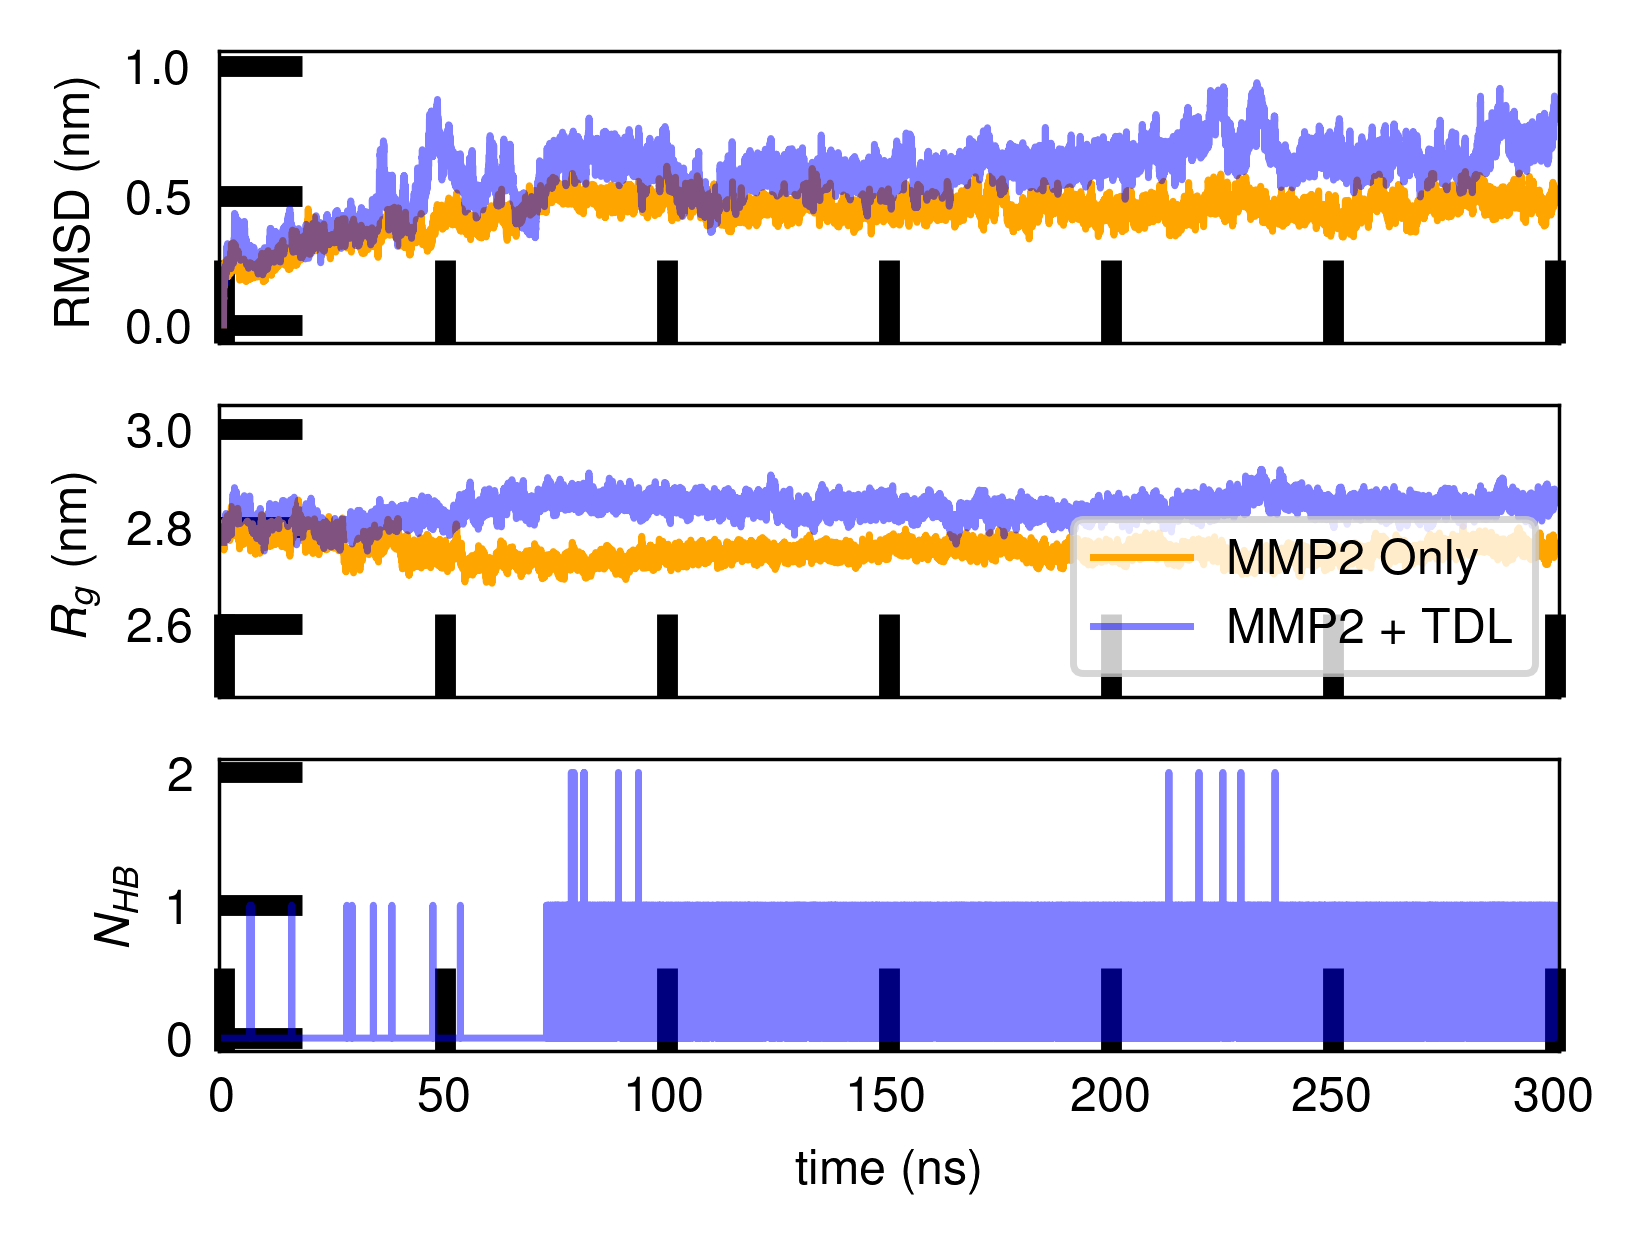

In [49]:
npanels = 3
fig, axs = plt.subplots(npanels,1, sharex=True, tight_layout=True)

ax_rmsd = axs[0]
ax_rmsd.set_ylabel(r'RMSD (nm)');

ax_rmsd.plot(times_p/1000, rmsd_p/10, label="MMP2 Only", 
        color='orange')
ax_rmsd.plot(times_c/1000, rmsd_c/10, label="MMP2 + TDL", 
        alpha=0.5, color='blue')
ax_rmsd.set_ylim(-0.07, 1.06)

ax_rg = axs[1]
ax_rg.plot(Rgyrp_table[:,1]/1000, Rgyrp_table[:,2]/10, 
        label="MMP2 Only", color='orange')
ax_rg.plot(Rgyrc_table[:,1]/1000, Rgyrc_table[:,2]/10, 
        label="MMP2 + TDL", alpha=0.5,color='blue')
ax_rg.set_ylabel(r'$R_g$ (nm)');
ax_rg.set_ylim(2.45, 3.05)
ax_rg.legend()

ax_bonds = axs[2]
ax_bonds.set_xlabel(r'time (ns)');
ax_bonds.set_xlim(-1, 301);

ax_bonds.plot(hbonds_prot_tdl.times/1000, hbonds_prot_tdl.count_by_time(), 
        lw=1, label="MMP2 + TDL", alpha=0.5,color='blue')

#plt.title("Number of hydrogon bonds over time", weight="bold")
ax_bonds.set_ylabel(r"$N_{HB}$")
plt.savefig("time-series-plots.png", dpi=600)
plt.show()


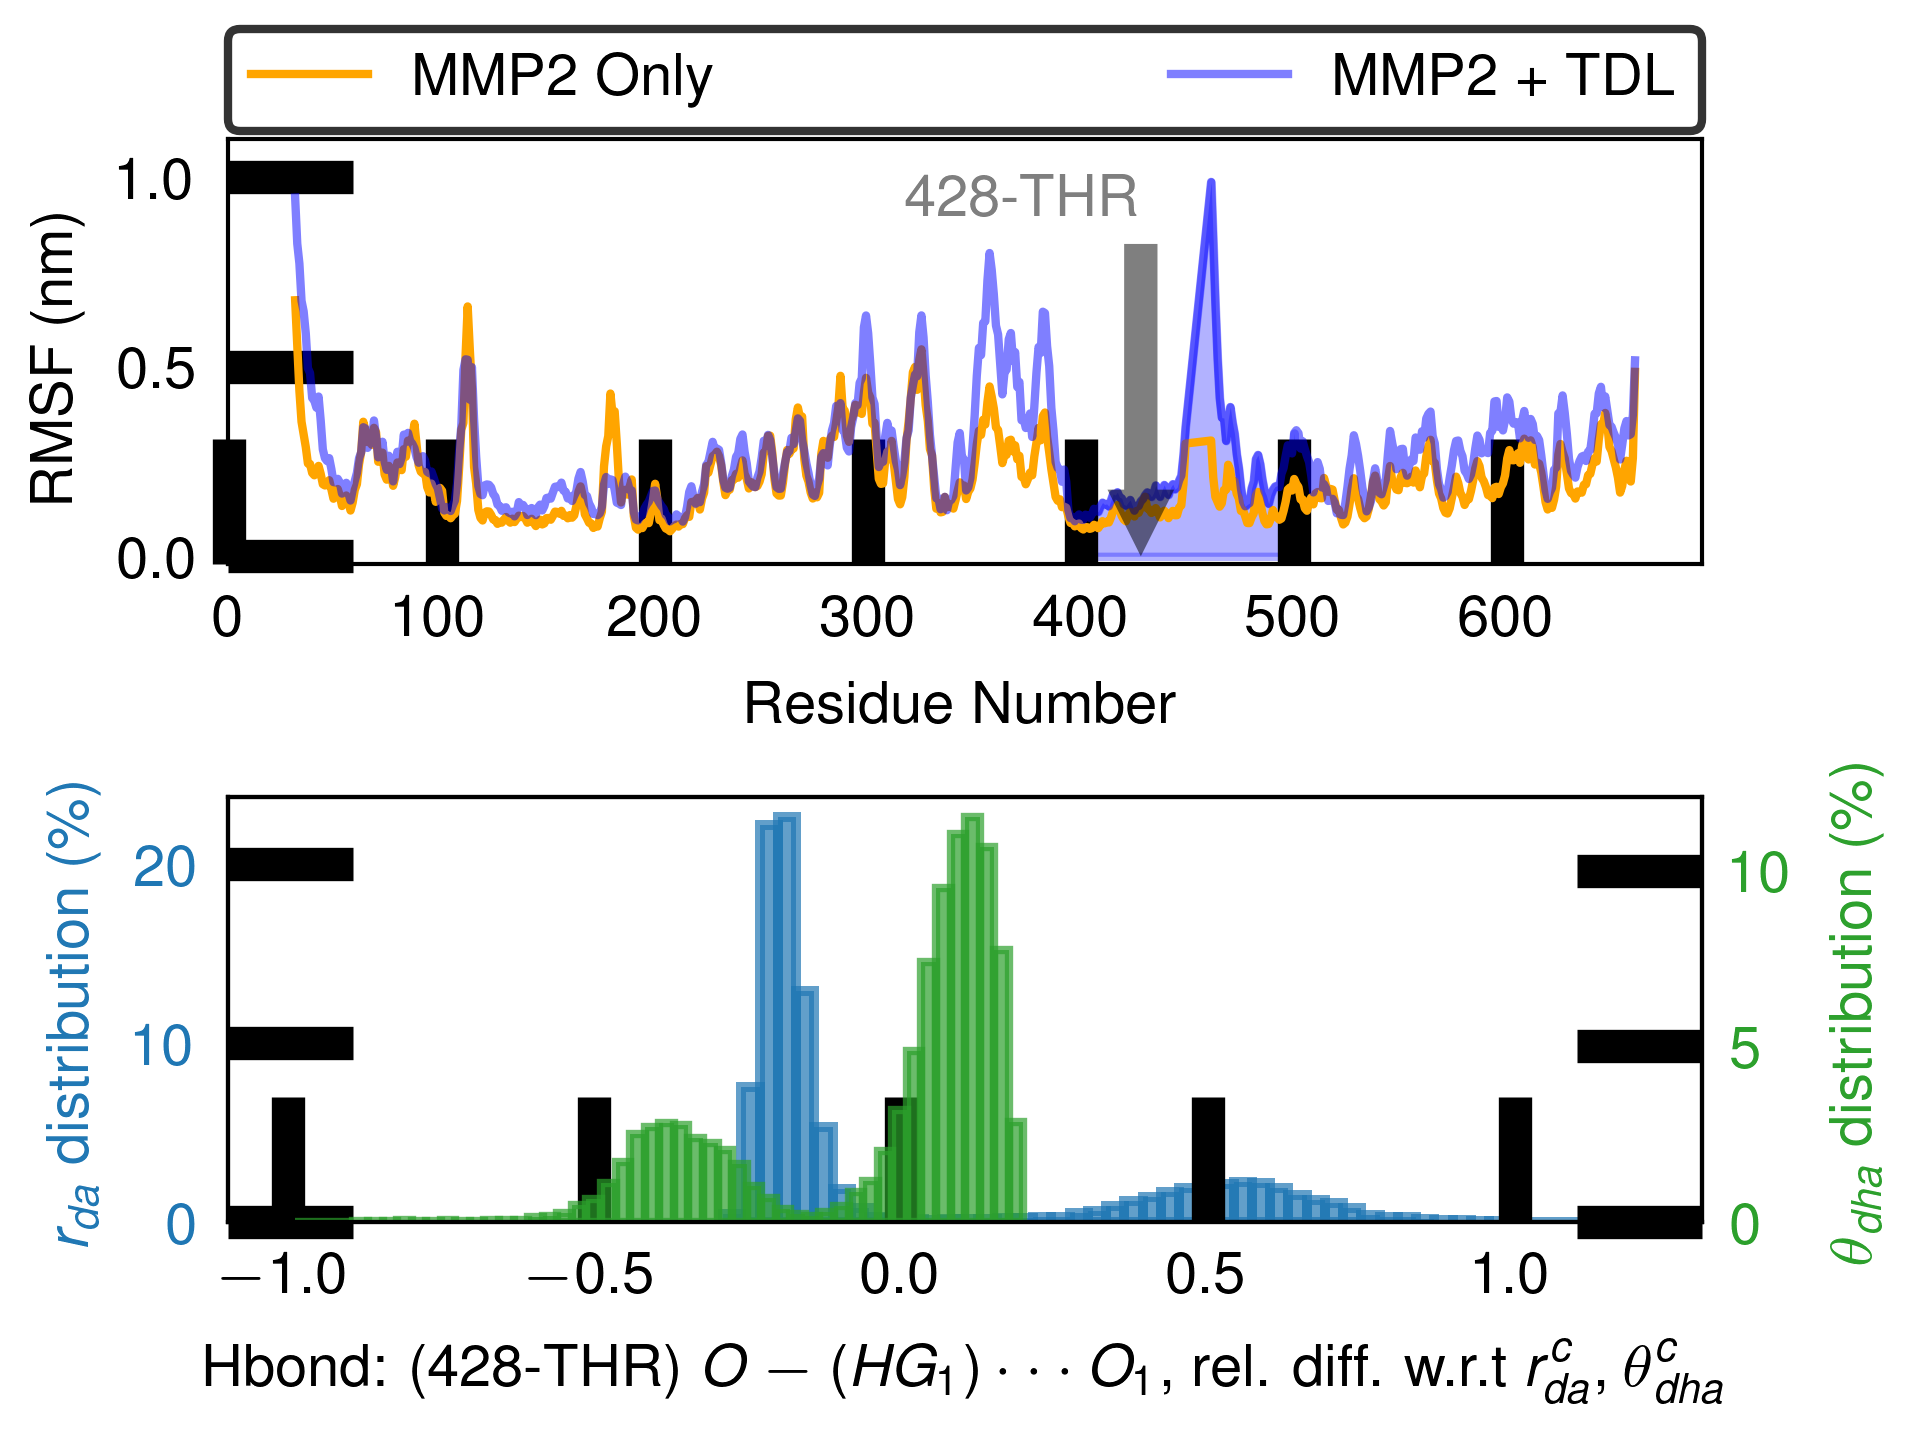

In [149]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('nature')
plt.rcParams['text.usetex'] = True
fig, (ax_rmsf, ax_hist) = plt.subplots(2, 1, tight_layout=True)

# Plot RMSF
line_p, = ax_rmsf.plot(c_alphas_p.resids, R_p.results.rmsf/10,\
                        label="MMP2 Only", color="orange")
line_c, = ax_rmsf.plot(c_alphas_c.resids, R_c.results.rmsf/10,\
                        label="MMP2 + TDL", alpha=0.5, color="blue")
ax_rmsf.fill_between(c_alphas_c.resids, R_c.results.rmsf/10,\
                      where=(c_alphas_c.resids >= 400) & (c_alphas_c.resids <= 500), color="blue", alpha=0.3)
ax_rmsf.set_xlabel('Residue Number')
ax_rmsf.set_ylabel('RMSF (nm)')
ax_rmsf.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',\
                ncols=2, mode="expand", borderaxespad=0., frameon=True, fancybox=True, edgecolor='black')

hbonded_resids = [428]
for label in hbonded_resids:
    ax_rmsf.annotate(f'{label}-THR', xy=(label, 0), xytext=(label, 0.9),
                      ha='right',alpha=0.5, arrowprops=dict(facecolor='black', lw=1e-9,\
                                                   headwidth=8.0, headlength=8.0, alpha=0.5))
ax_rmsf.set_ylim(-0.02, 1.1)

# Plot histogram for relative differences
distance_cutoff = 3.35
angle_cutoff = 150
relative_distances = (distances_hbonds - distance_cutoff) / distance_cutoff
relative_angles = (angles_hbonds - angle_cutoff) / angle_cutoff

color = 'tab:blue'
ax_hist.hist(relative_distances, bins=50, color=color, alpha=0.7,\
              weights=100*np.ones_like(relative_distances) / len(u.trajectory))
ax_hist.set_xlabel(r'Hbond: ($428$-THR) $O-\left(HG_1\right)\cdots O_1$, rel. diff. w.r.t $r^c_{da}, \theta^c_{dha}$')
ax_hist.set_ylabel(r'$r_{da}$ distribution $(\%)$', color=color)
ax_hist.tick_params(axis='y', labelcolor=color)

for patch in ax_hist.patches:
    patch.set_linewidth(1.2)
    patch.set_edgecolor(color)


# Create a second y-axis for the relative angles
ax_hist2 = ax_hist.twinx()
color = 'tab:green'
ax_hist2.hist(relative_angles, bins=50, color=color, alpha=0.7,\
               weights=100*np.ones_like(relative_angles) / len(u.trajectory))
ax_hist2.set_ylabel(r'$\theta_{dha}$ distribution $(\%)$', color=color)
ax_hist2.tick_params(axis='y', labelcolor=color)


for patch in ax_hist2.patches:
    patch.set_linewidth(1.0)
    patch.set_edgecolor(color)

# Remove tick marks from unlabelled axes
ax_rmsf.yaxis.set_ticks_position('left')
ax_rmsf.xaxis.set_ticks_position('bottom')
ax_hist.xaxis.set_ticks_position('bottom')
# Unset all minor ticks
ax_rmsf.minorticks_off()
ax_hist.minorticks_off()
ax_hist2.minorticks_off()

plt.savefig("rmsf_hist.png", dpi=600)
plt.show()


### References
1. Gowers RJ, Carbone P. A multiscale approach to model hydrogen bonding: The case of polyamide. The Journal of Chemical Physics. 2015;142(22):224907. [doi:10.1063/1.4922445](http://dx.doi.org/10.1063/1.4922445).
2. [MDAnalysis Guide (deprecated)](https://docs.mdanalysis.org/1.1.0/documentation_pages/analysis/hbond_autocorrel.html)


### Pretty Pics

Dump out PDBs and view pymol, since nglview seems to be crap. See below.

Also, do 2D representations in [LigPlot+](https://www.ebi.ac.uk/thornton-srv/software/LigPlus/).

This can be done from `GROMACS` cmd-line as


```console
gmx trjconv -f e<file>.xtc -s <file>.tpr -n <file>.ndx -dump 40003 -o pdb_file.pdb
```

change $40003$ to nearest time to the desired time (in picoseonds).